In [1]:
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.feature_selection import VarianceThreshold

sns.set_theme(style="ticks",color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [2]:
#import dataset
df=pd.read_csv('Sonar.csv')


In [3]:
# view dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# shape
print("shape of sonar dataset",df.shape)


shape of sonar dataset (208, 61)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [6]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [7]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df.describe(include="object")


,Class
count,208
unique,2
top,M
freq,111


In [8]:
# class distribution
print(df.groupby('Class').size())

Class
M    111
R     97
dtype: int64


In [9]:
# class distribution
print(df.groupby('Class').size()/len(df))

Class
M    0.534
R    0.466
dtype: float64


AxesSubplot(0.260833,0.125;0.503333x0.755)


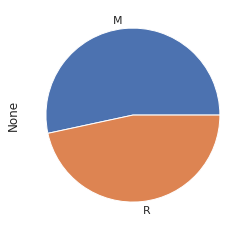

In [10]:
# class distribution
print(df.groupby('Class').size().plot.pie())

# FEATURE ENGINEERING

In [11]:
# CHECKING OF MISSING VALUES
print("Total missing values of each columns")
print(df.isnull().sum())
print(" ")
print("Total missing values is:")
print(df.isnull().any().sum())
print(" ")
print("missing values(True or False)")
print(df.isnull().any())

Total missing values of each columns
V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64
 
Total missing values is:
0
 
missing values(True or False)
V1       False
V2       False
V3       False
V4       False
V5       False
         ...  
V57      False
V58      False
V59      False
V60      False
Class    False
Length: 61, dtype: bool


In [12]:
# summarize the number of unique values in each column
print(df.nunique())

V1       177
V2       182
V3       190
V4       181
V5       193
        ... 
V57      121
V58      124
V59      119
V60      109
Class      2
Length: 61, dtype: int64


In [13]:
# locate rows of duplicate data
df.duplicated().any()

False

Visualization before preprocessing

In [14]:
#encode the target
df['Class']=df['Class'].map({'M':0.0,'R':1.0})

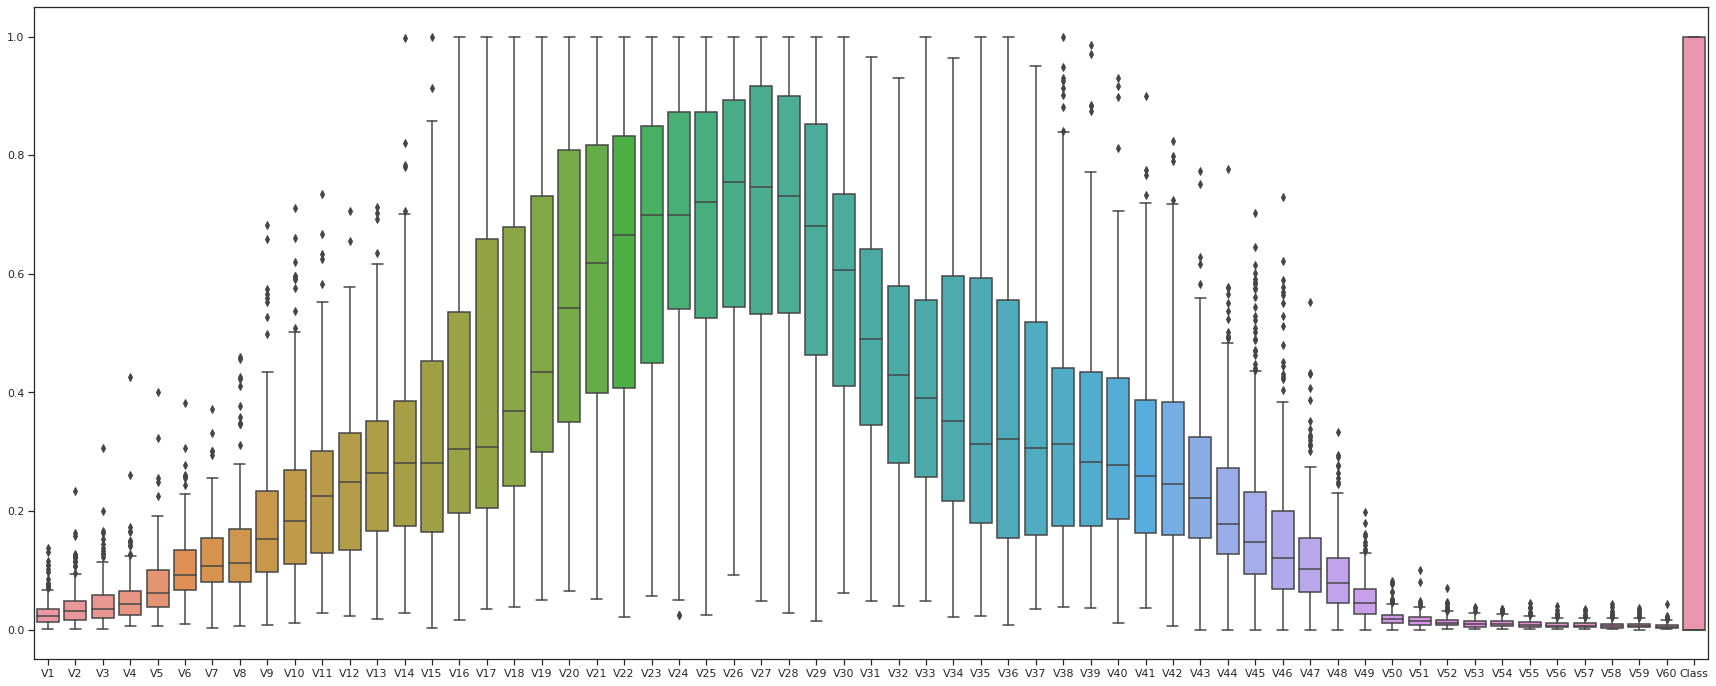

In [15]:
# boxplot
boxplot=df.copy()
cols=list(boxplot.columns)
plt.figure(figsize=(30,12))
sns.boxplot(data=boxplot)

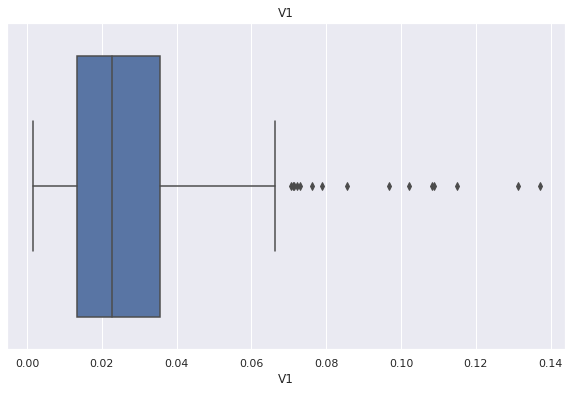

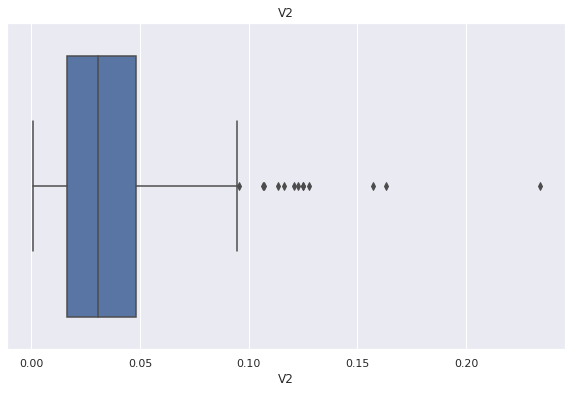

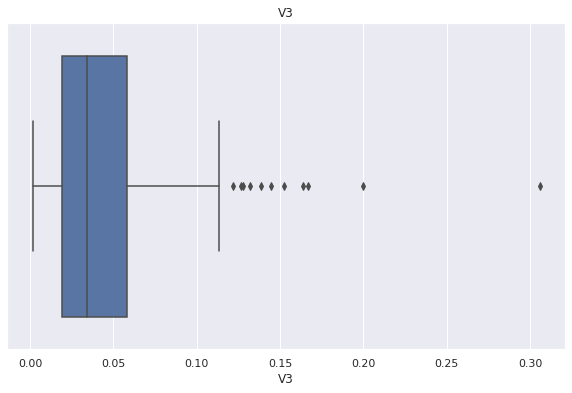

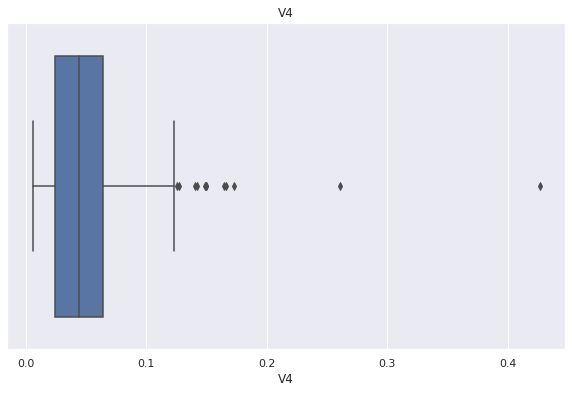

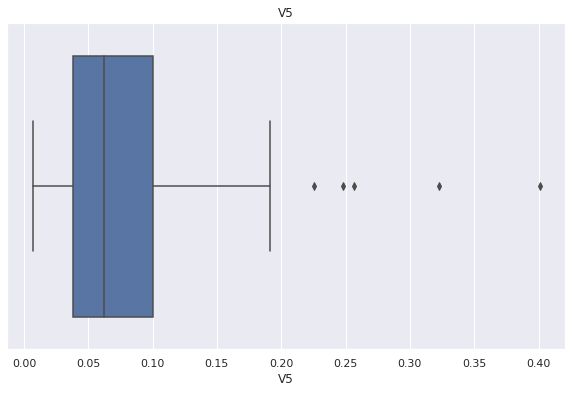

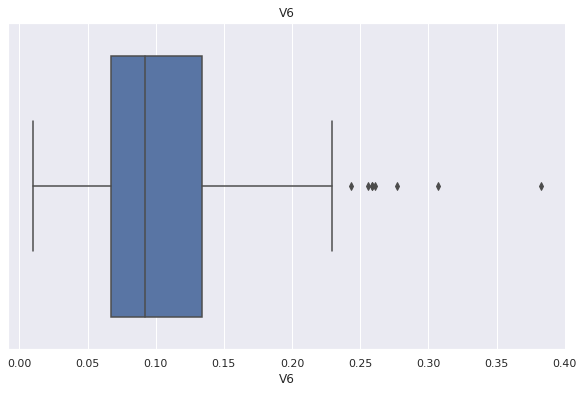

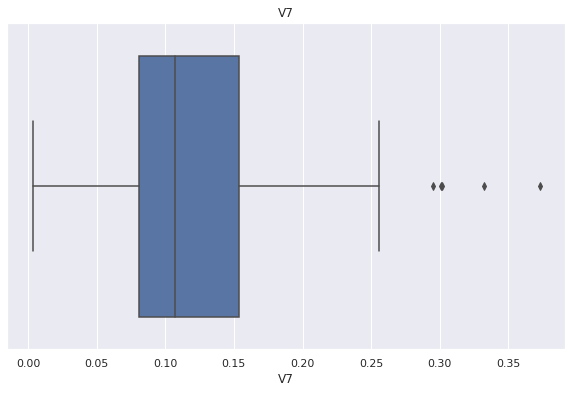

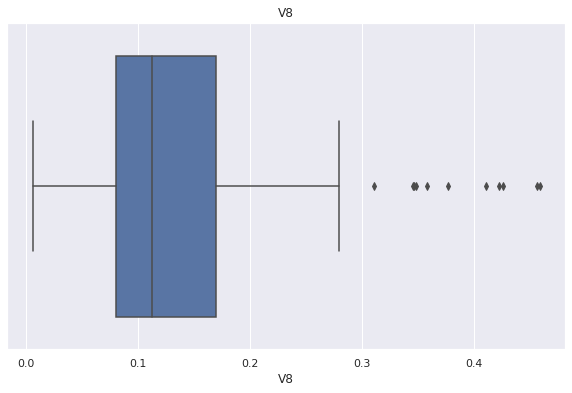

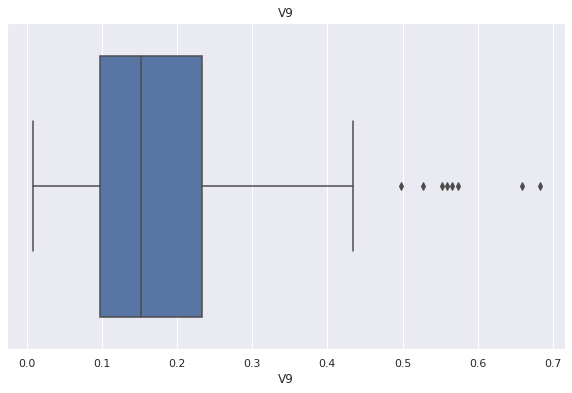

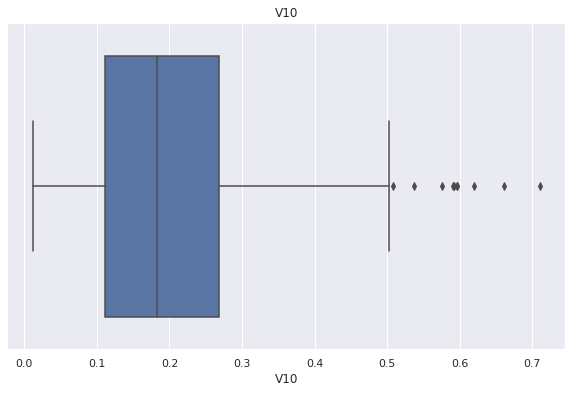

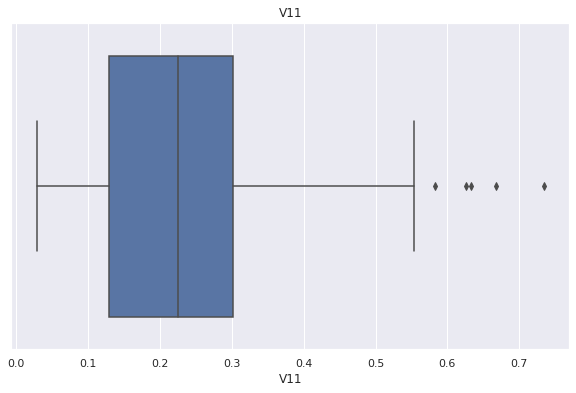

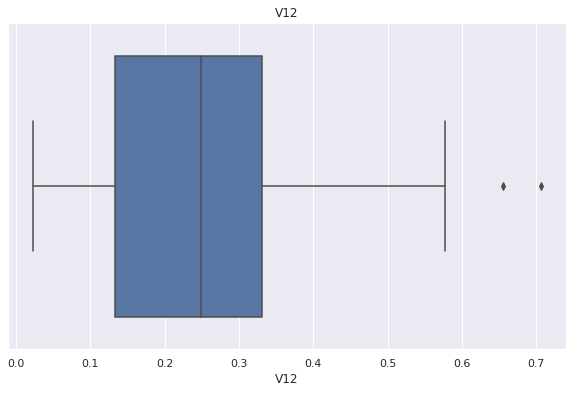

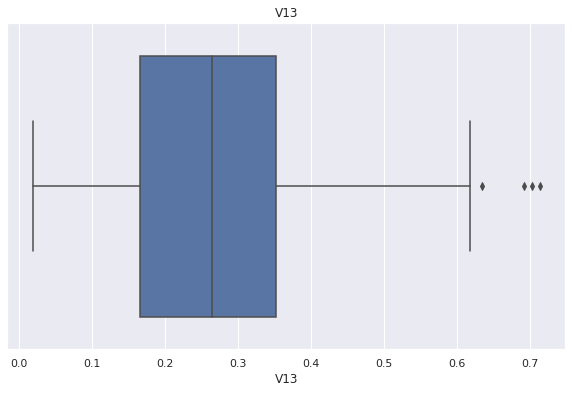

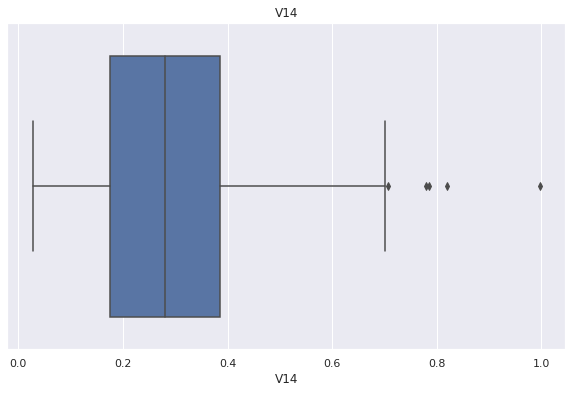

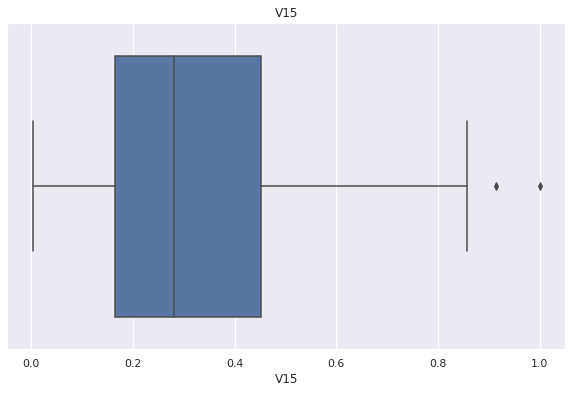

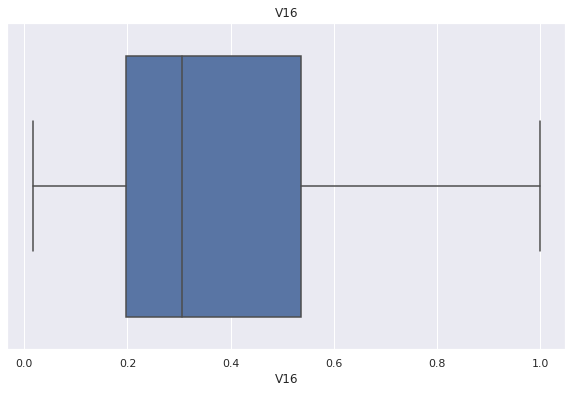

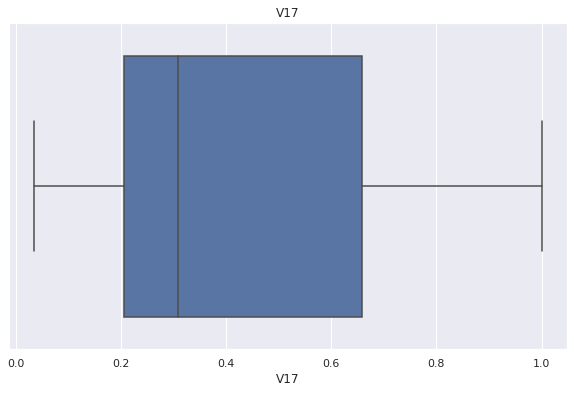

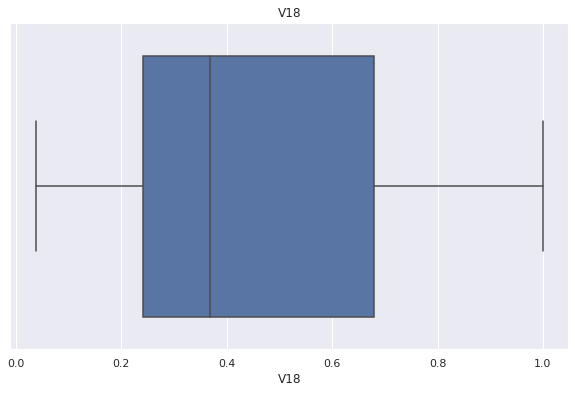

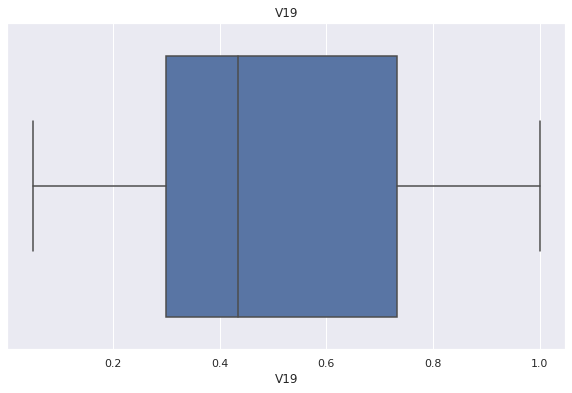

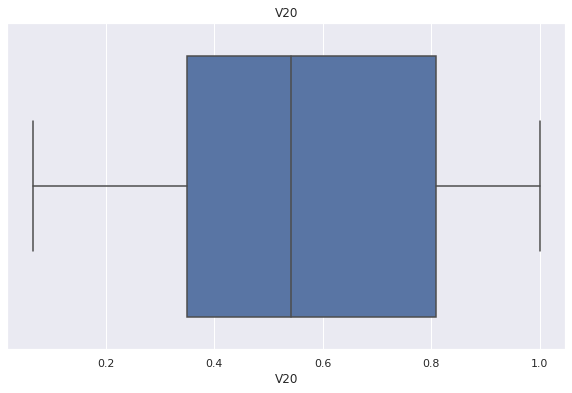

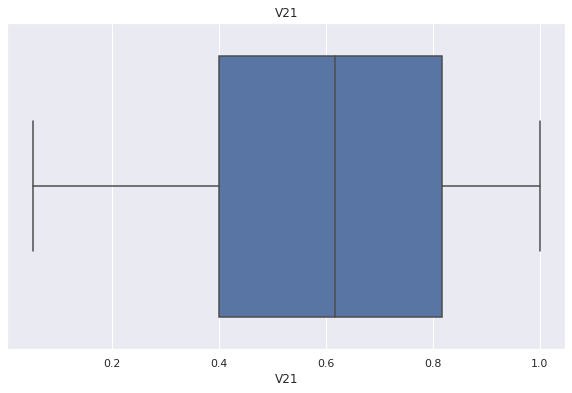

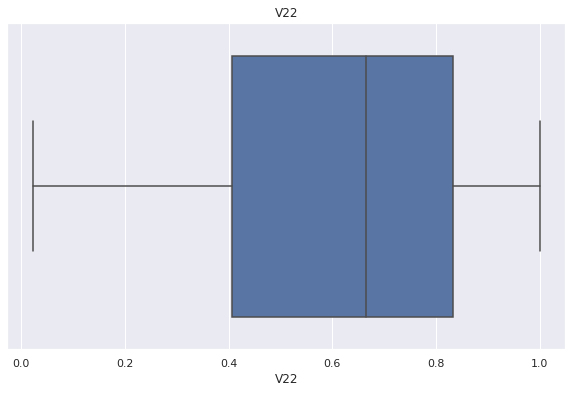

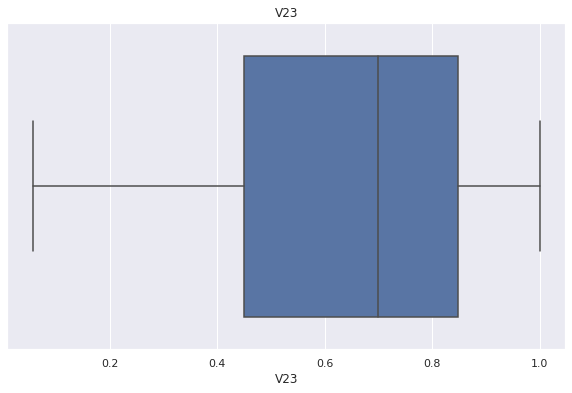

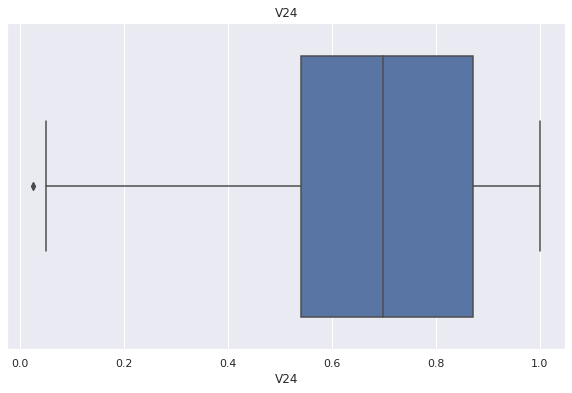

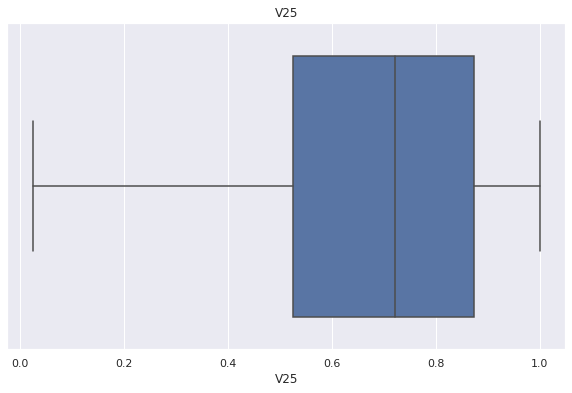

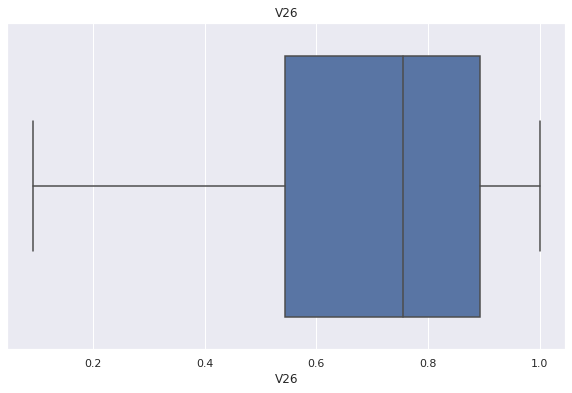

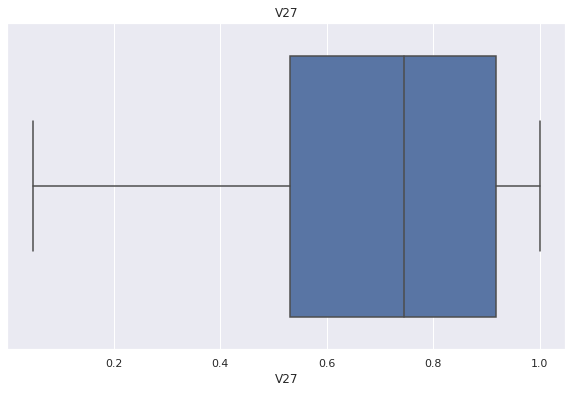

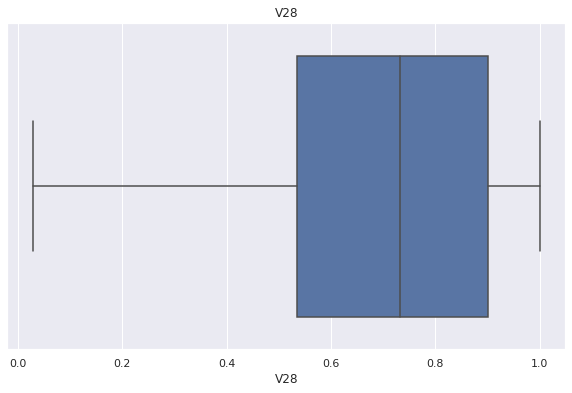

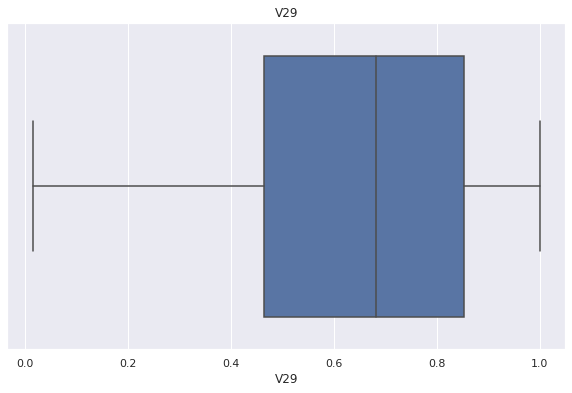

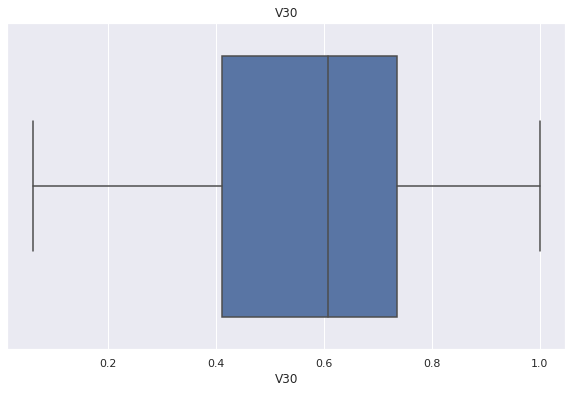

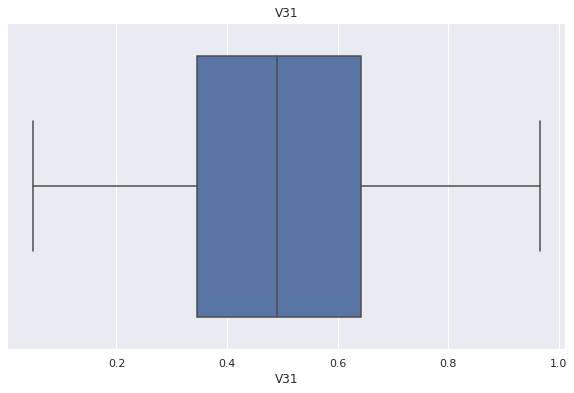

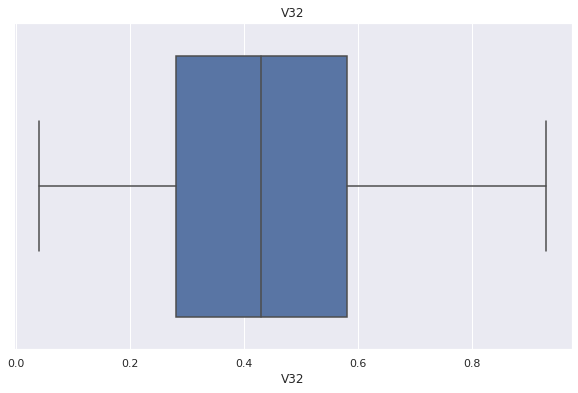

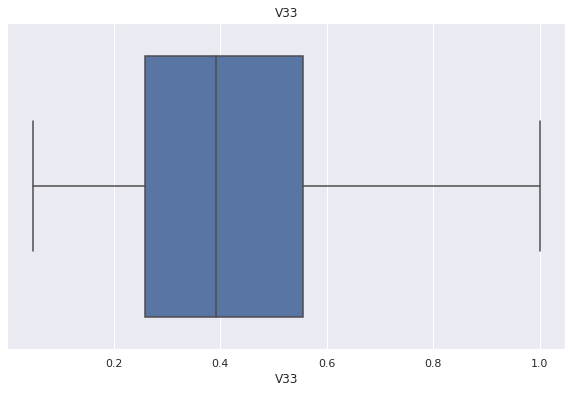

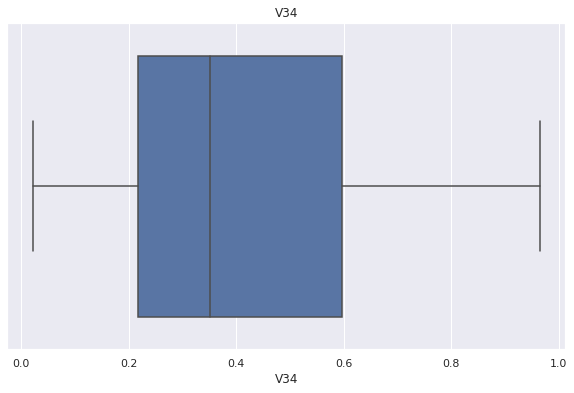

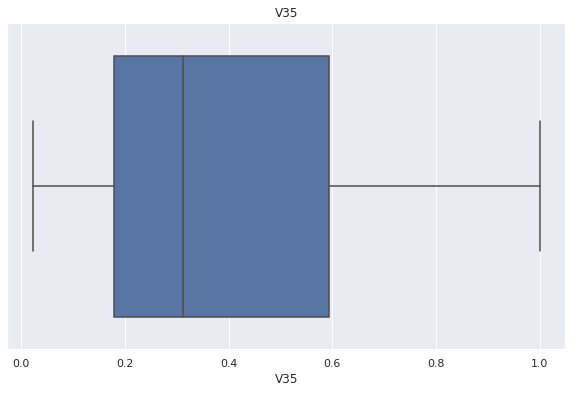

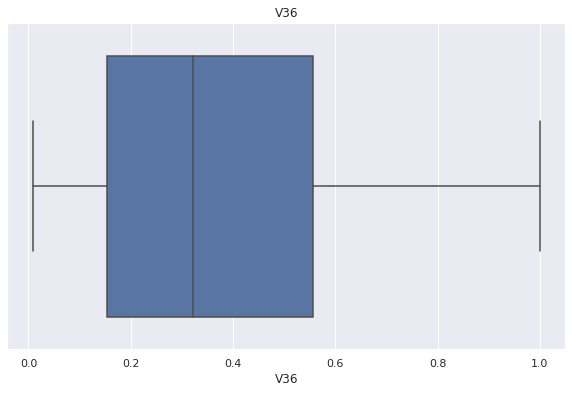

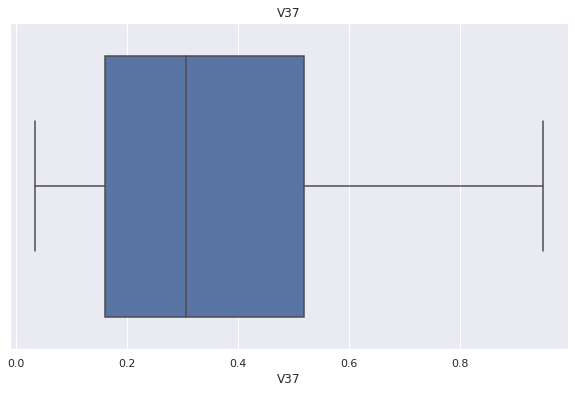

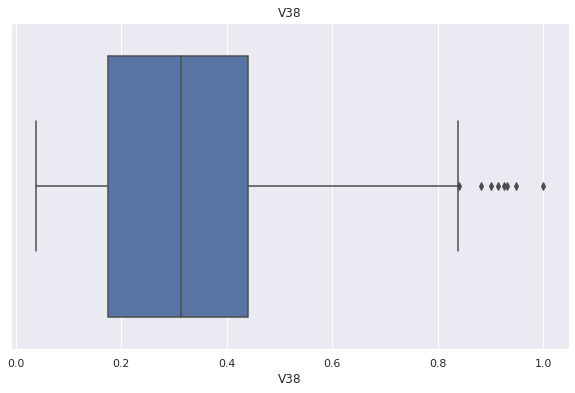

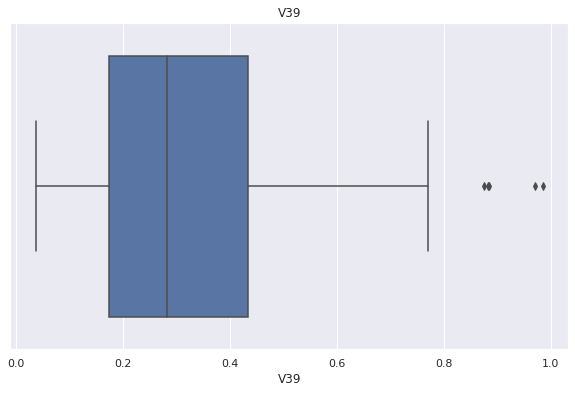

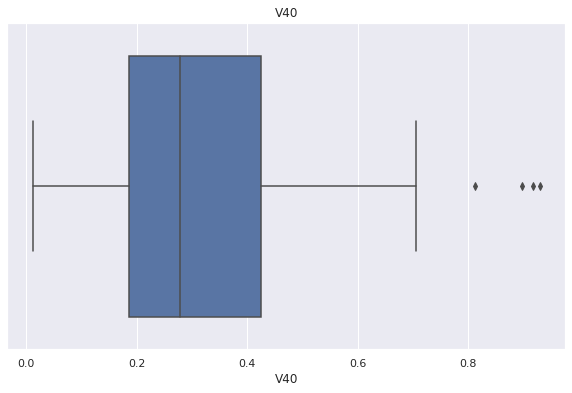

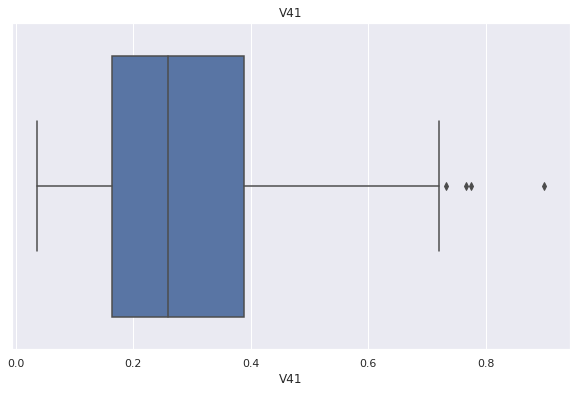

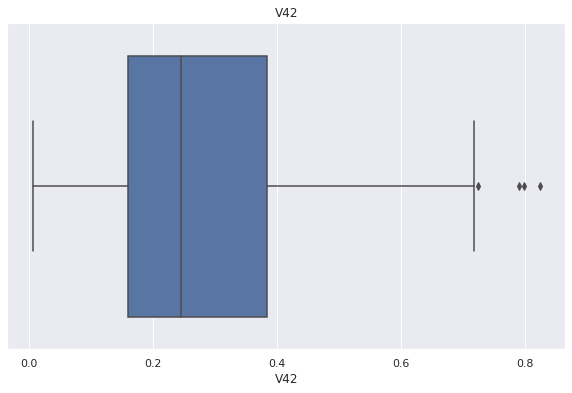

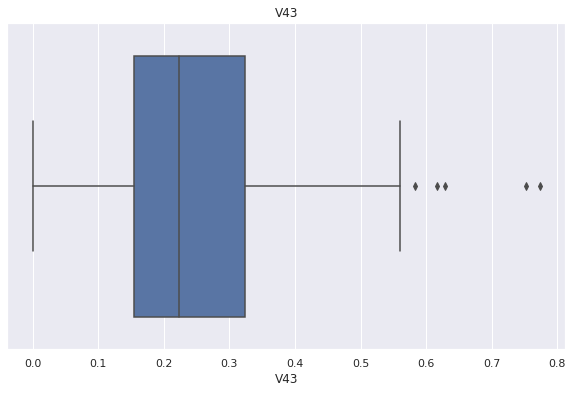

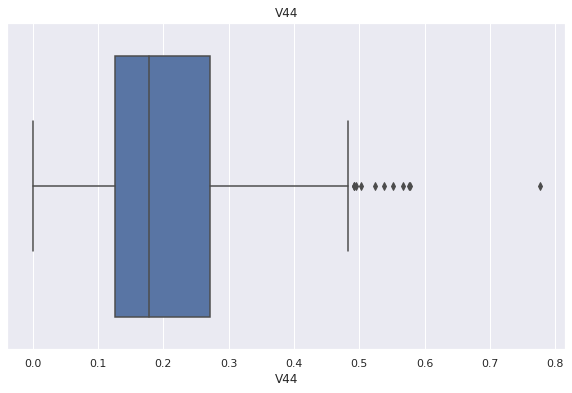

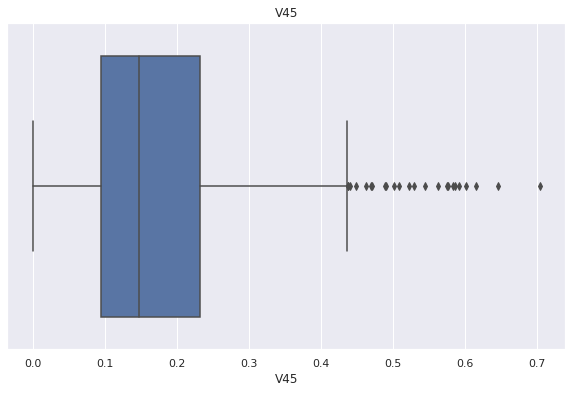

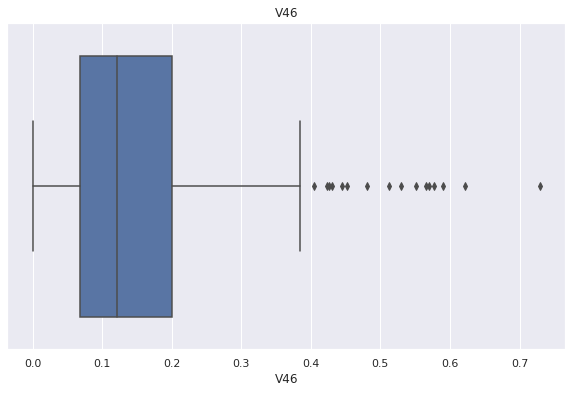

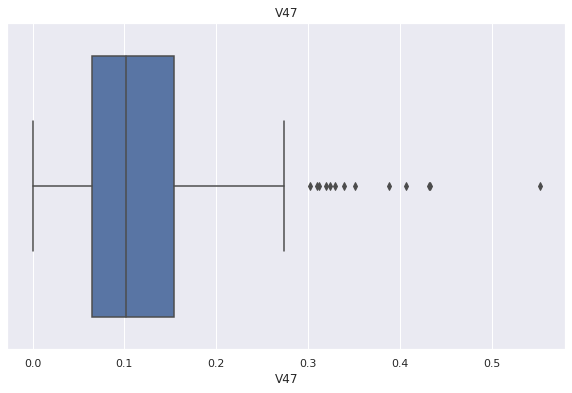

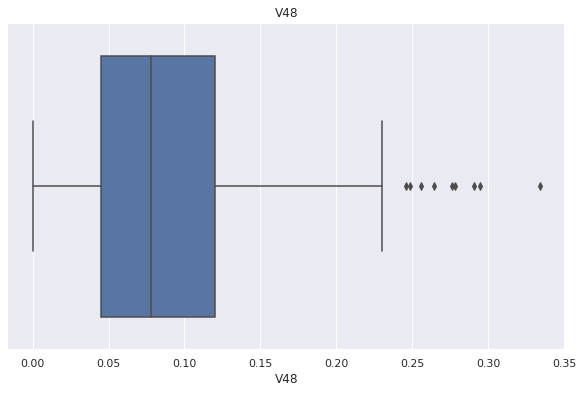

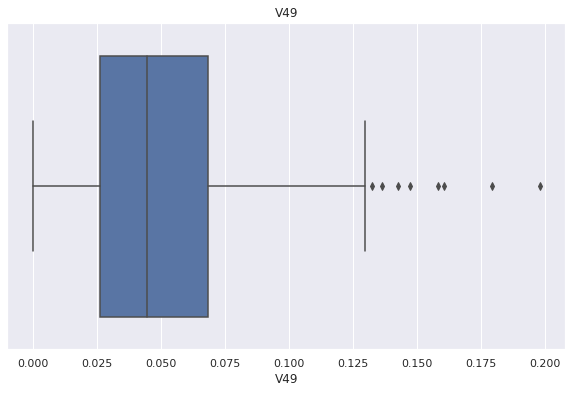

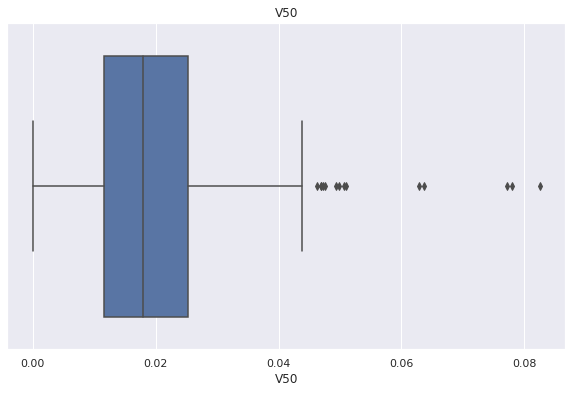

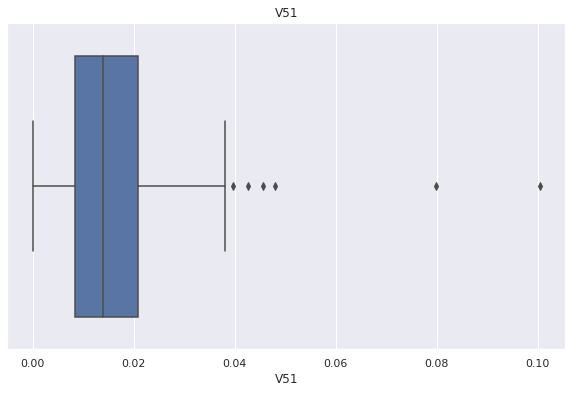

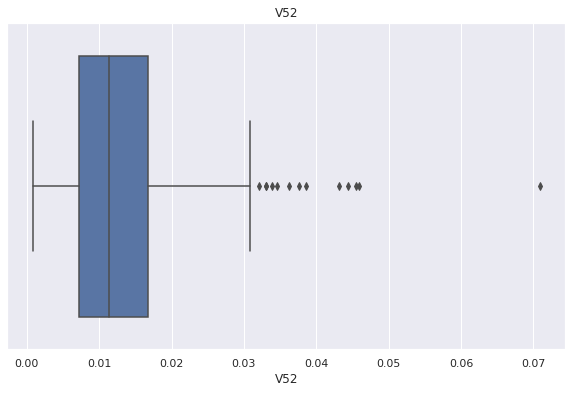

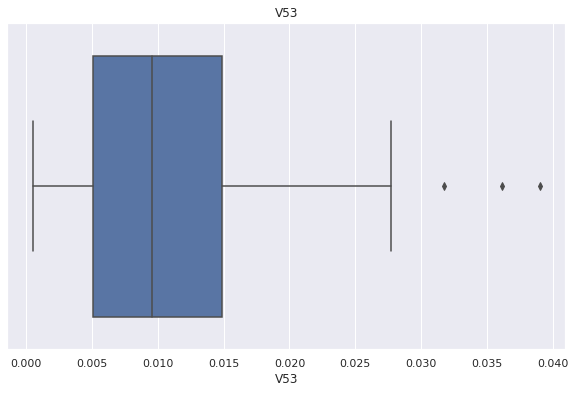

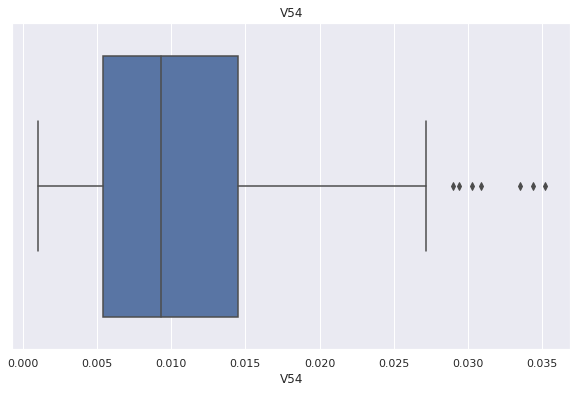

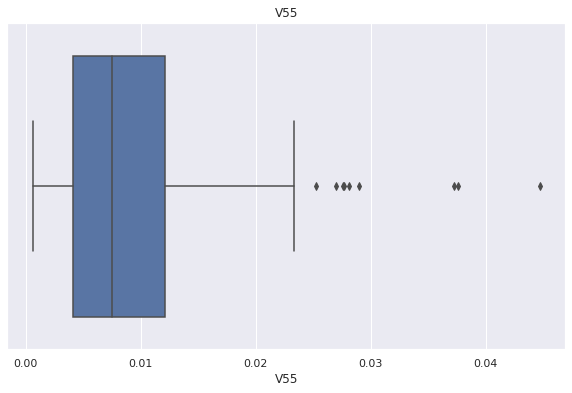

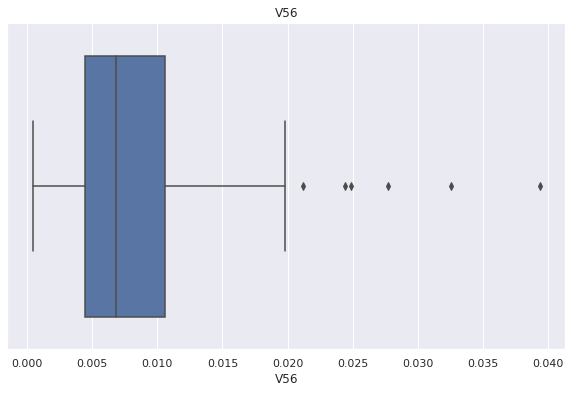

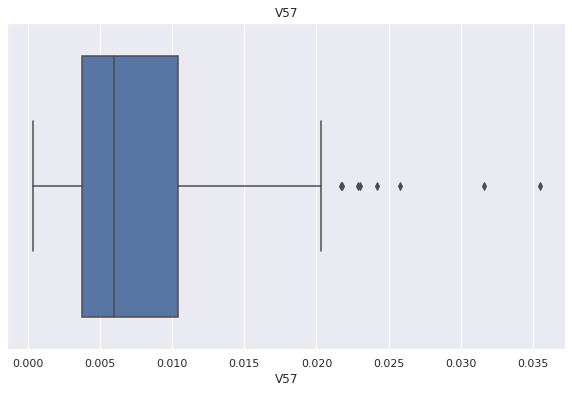

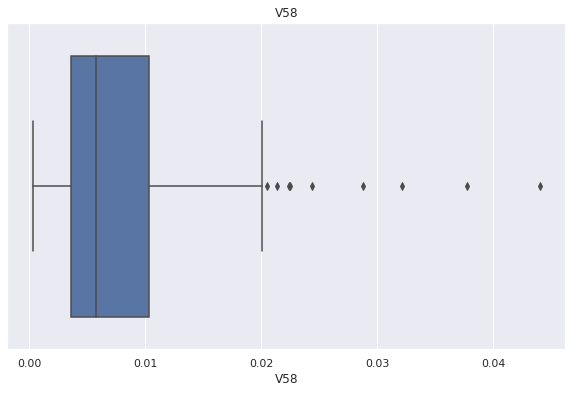

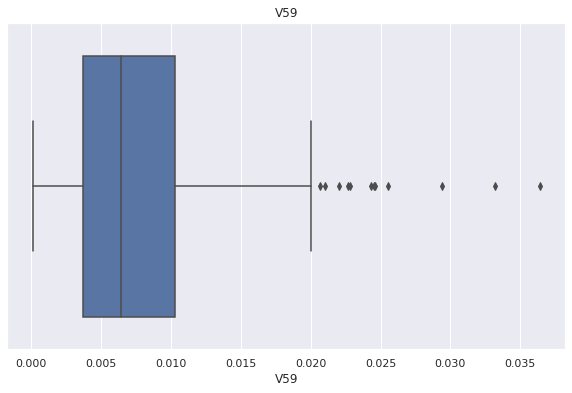

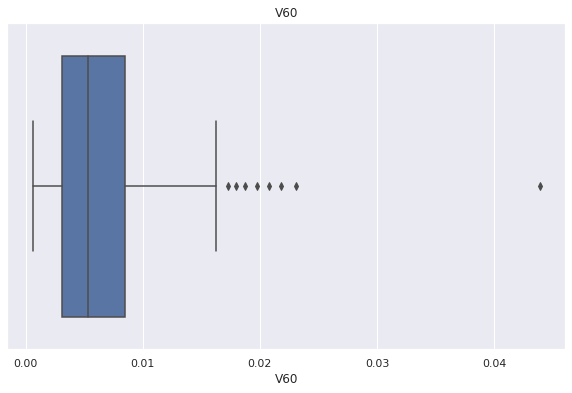

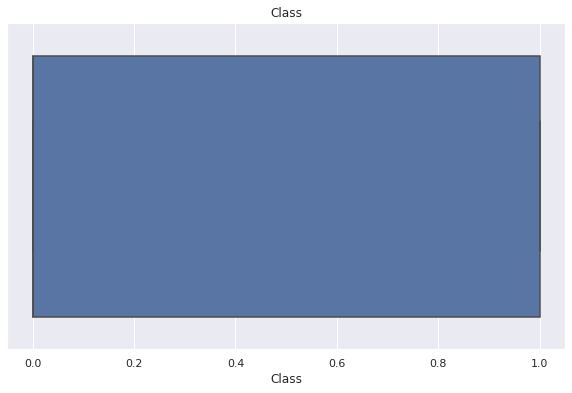

In [16]:
#Boxplot for checking of outliers
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.boxplot(boxplot[col])
    plt.title(col)
    plt.show()

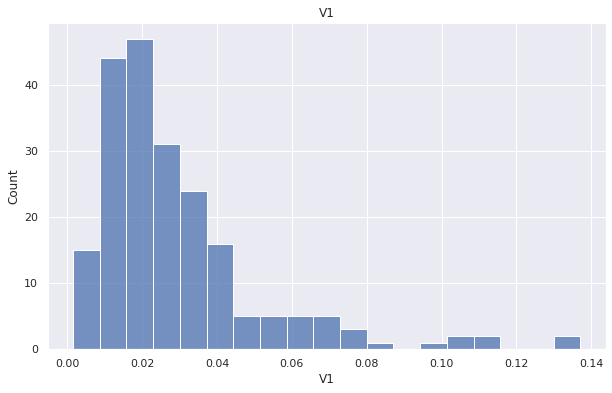

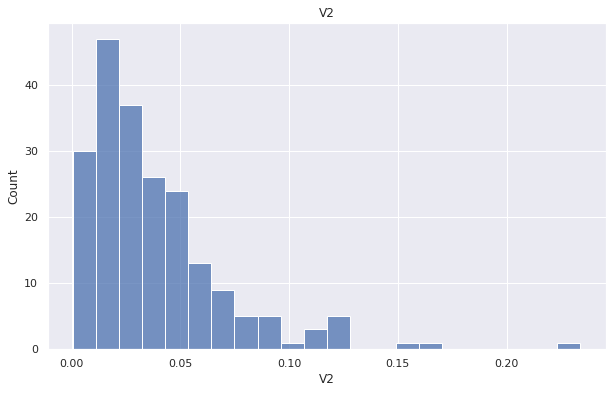

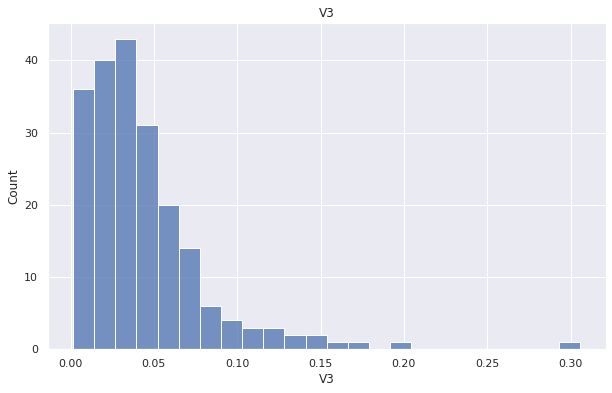

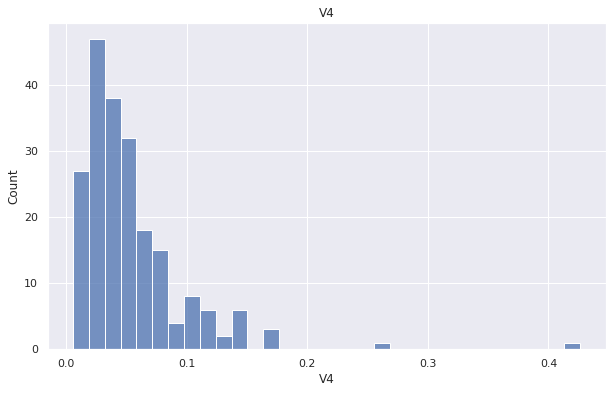

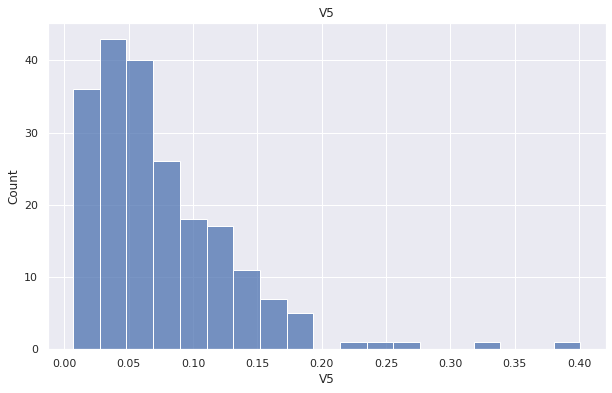

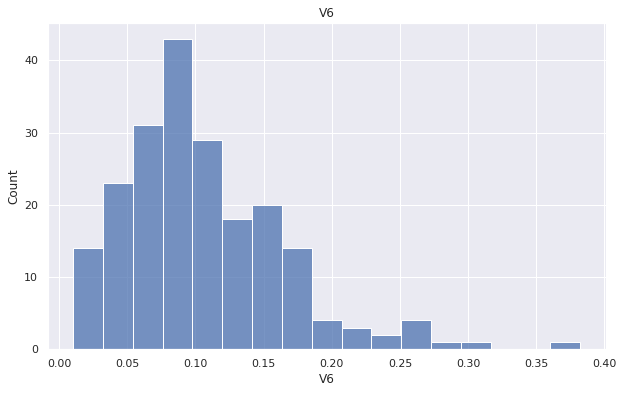

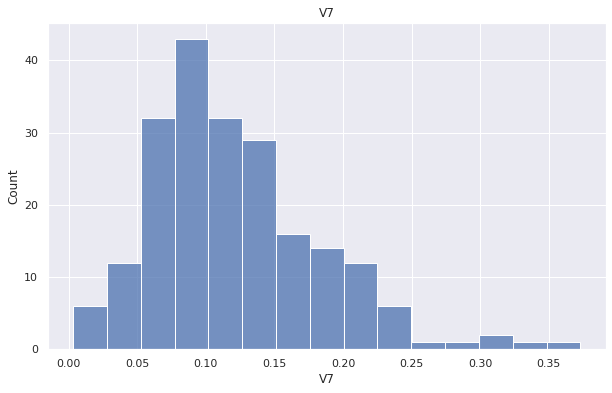

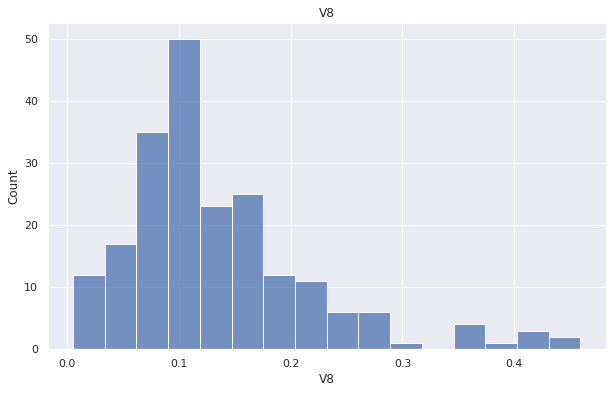

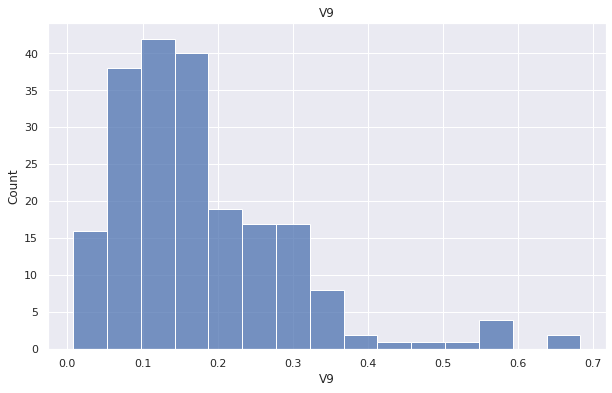

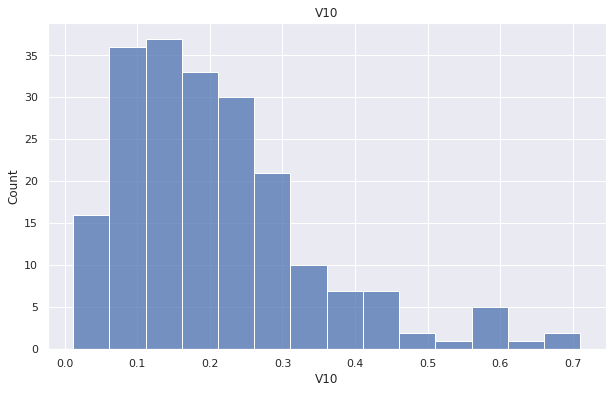

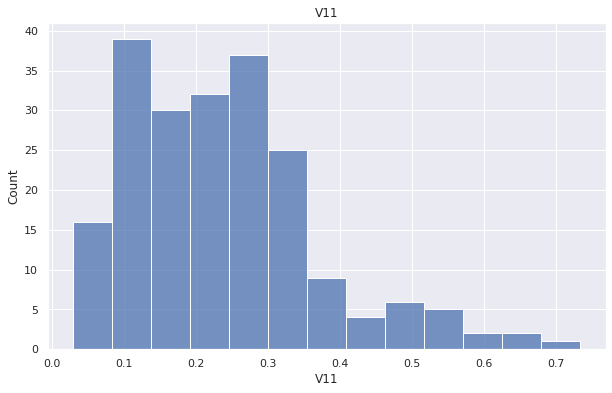

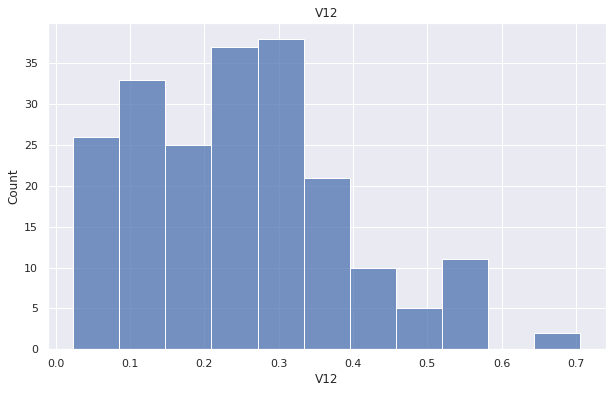

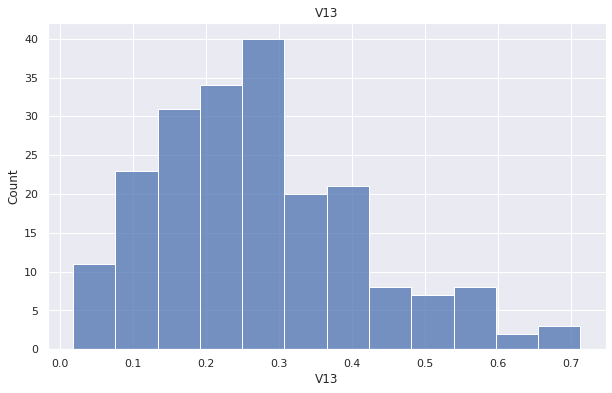

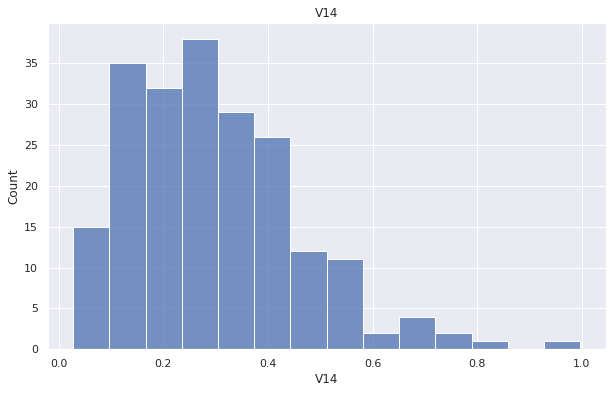

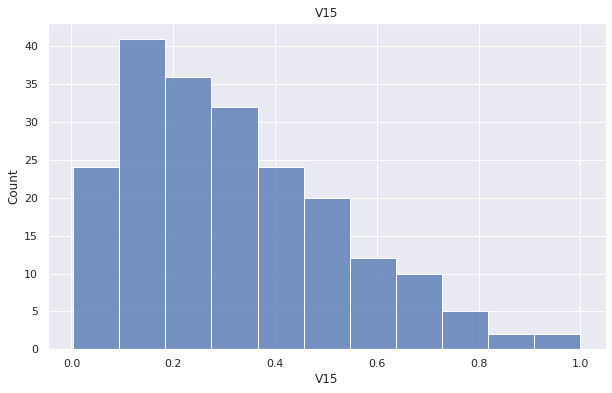

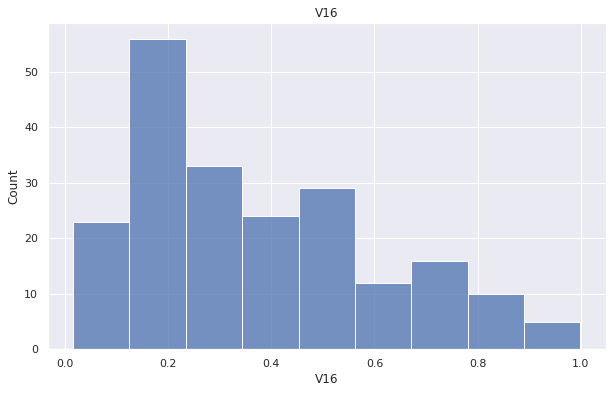

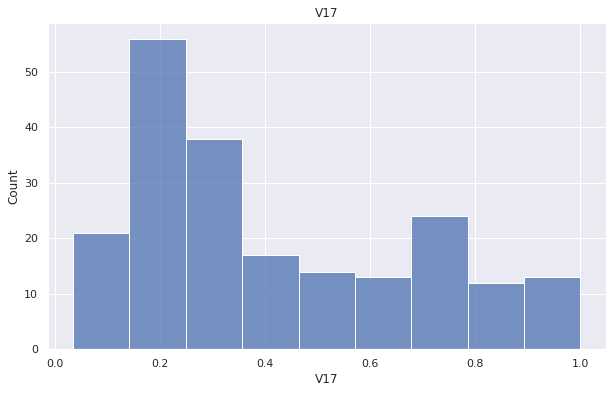

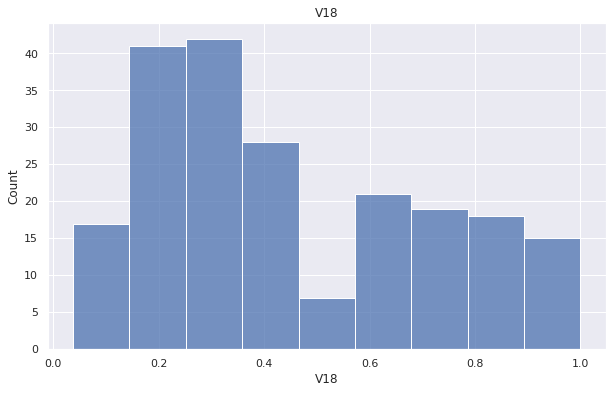

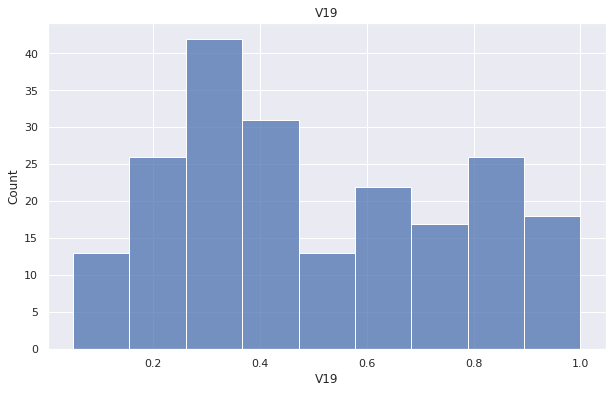

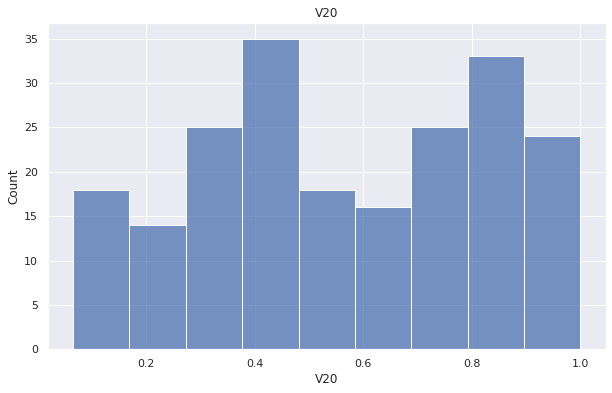

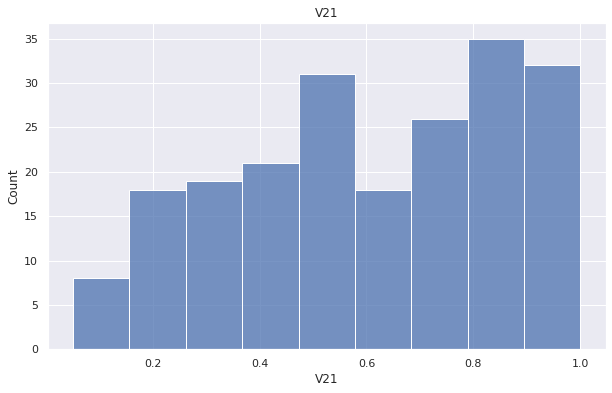

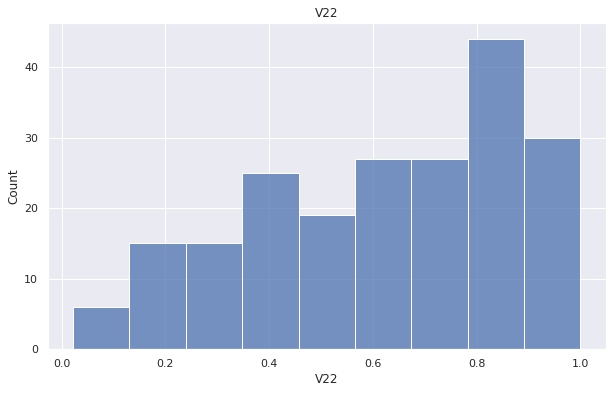

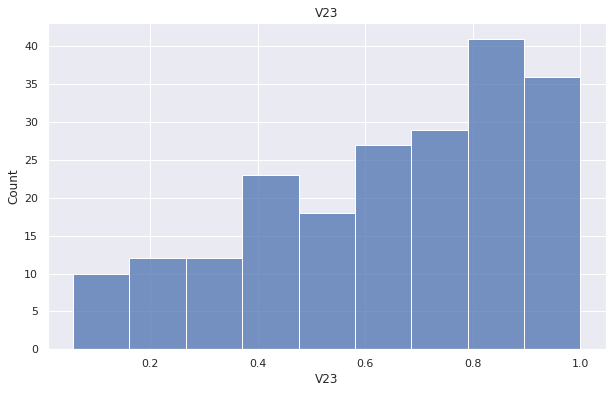

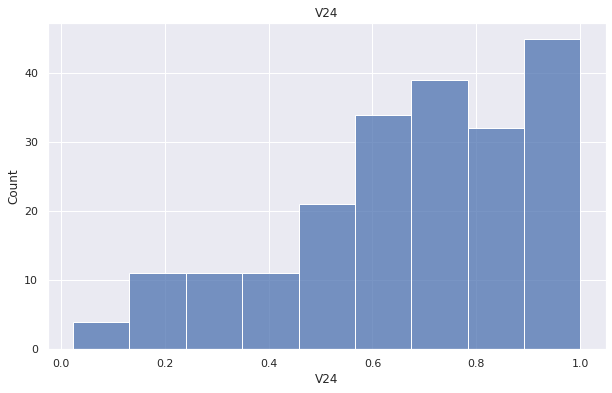

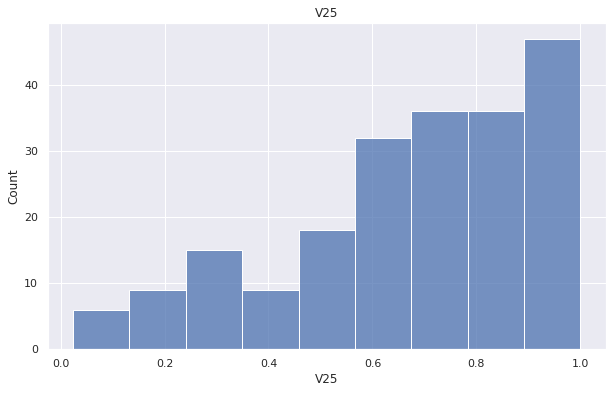

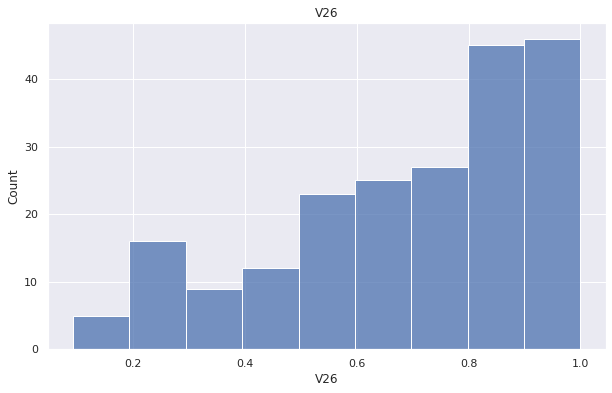

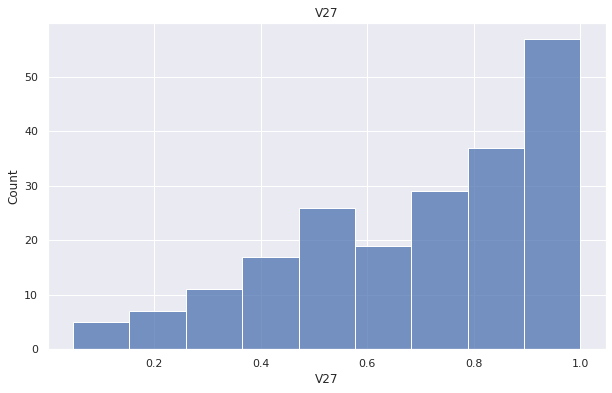

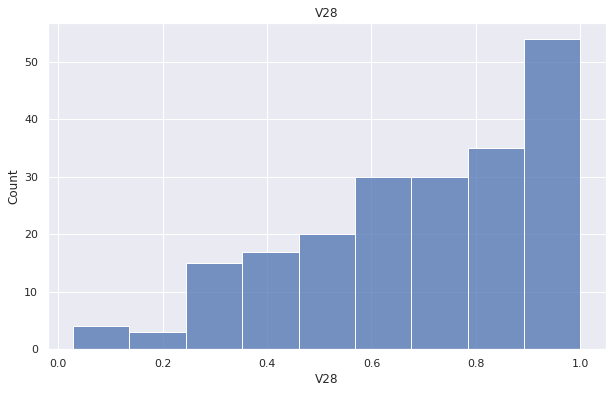

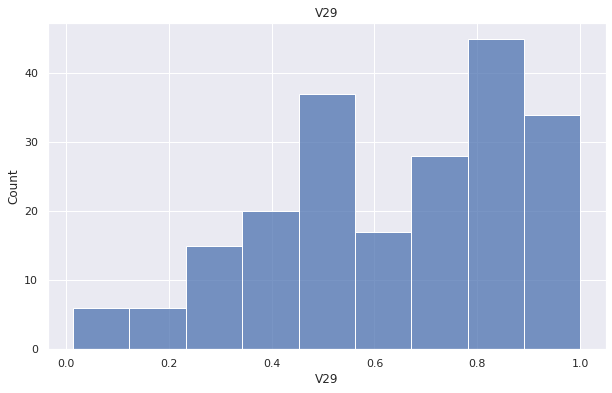

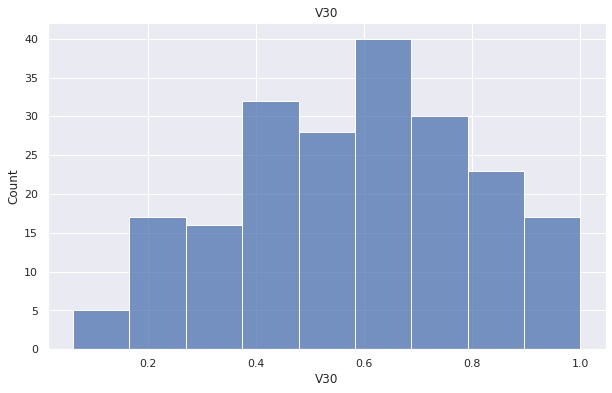

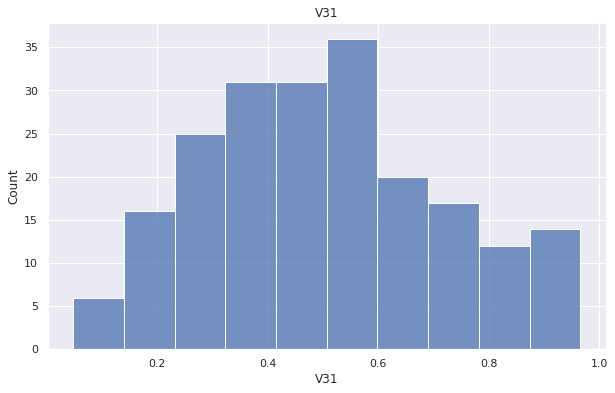

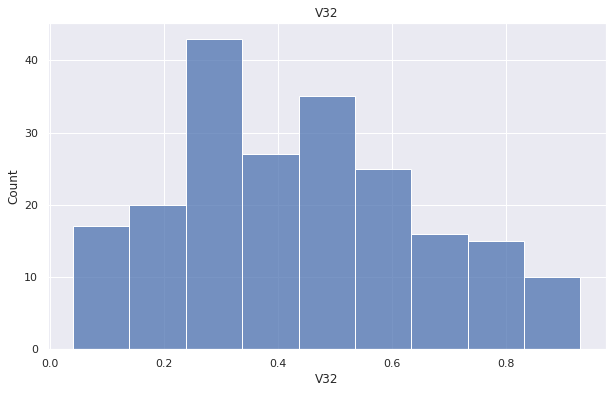

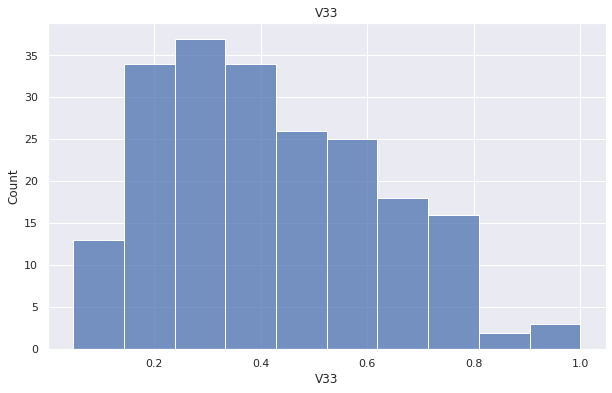

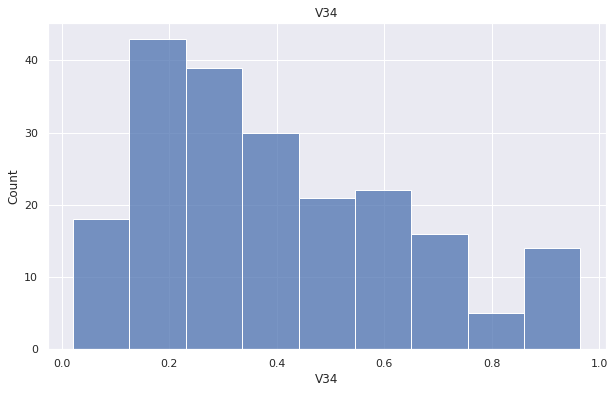

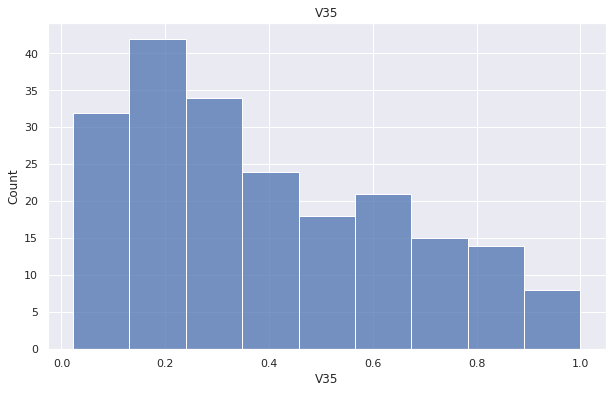

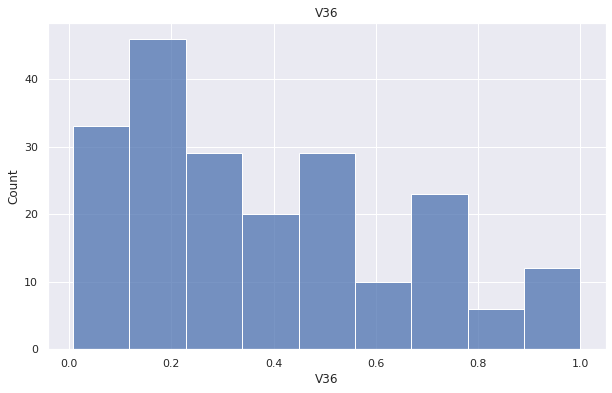

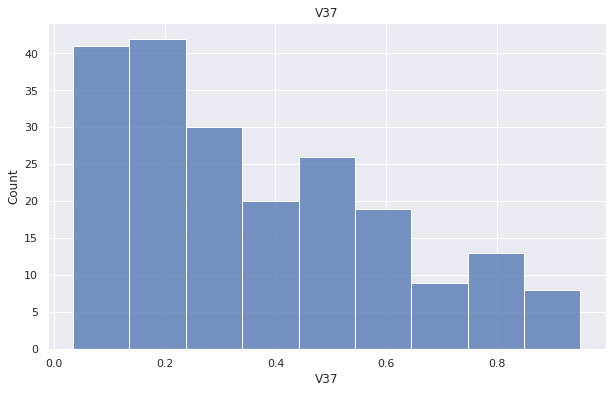

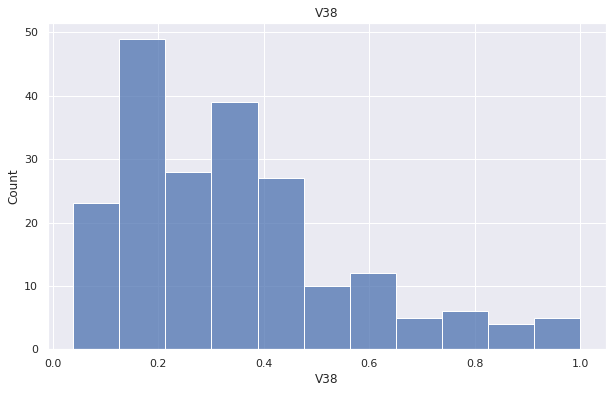

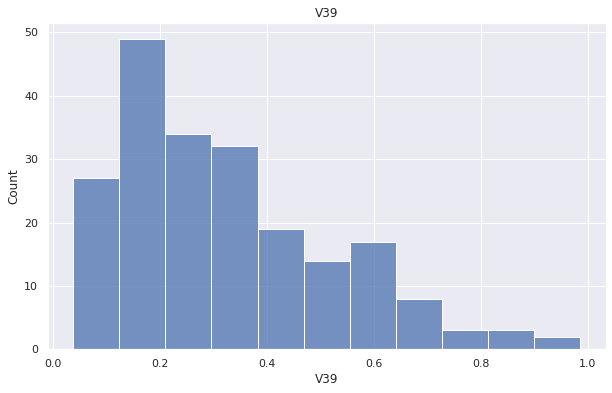

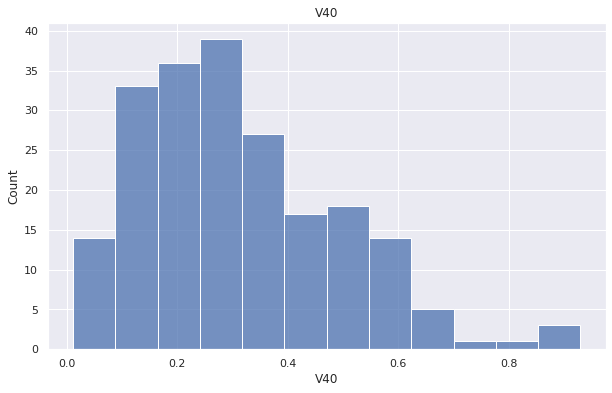

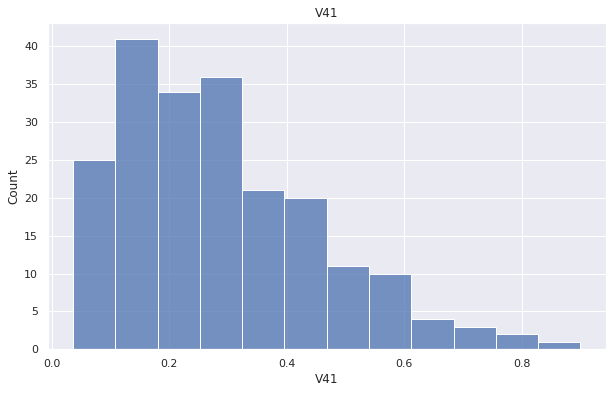

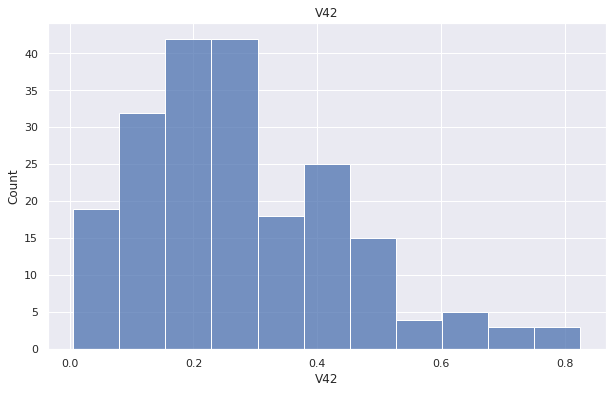

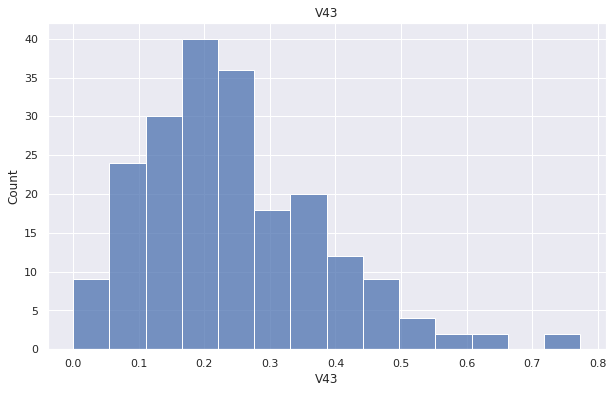

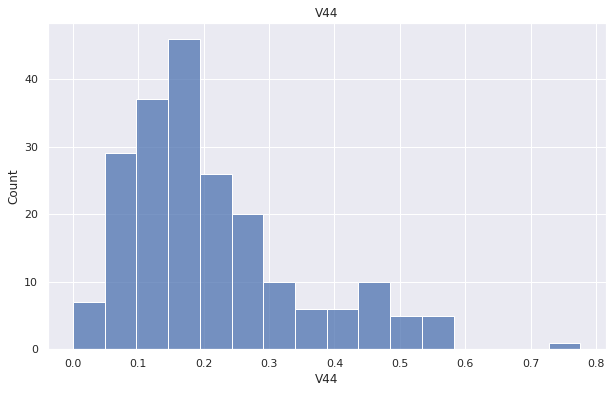

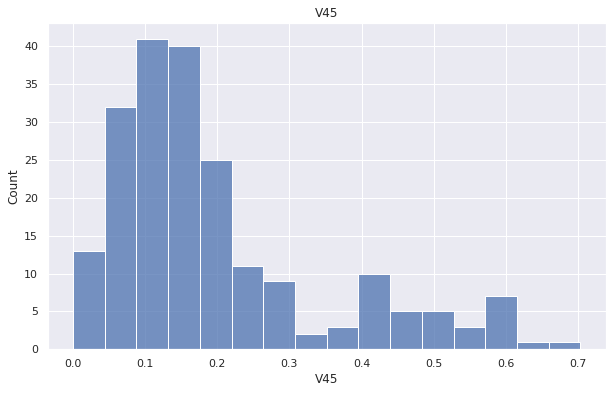

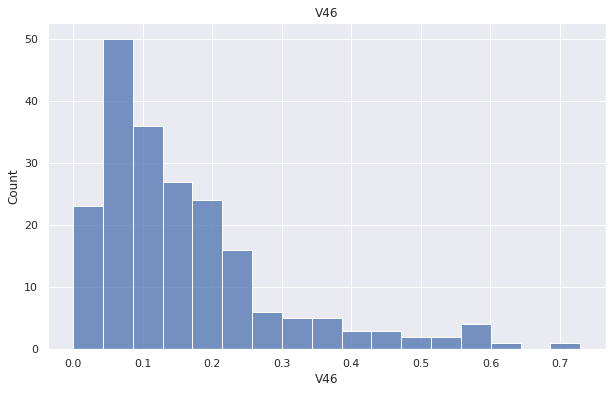

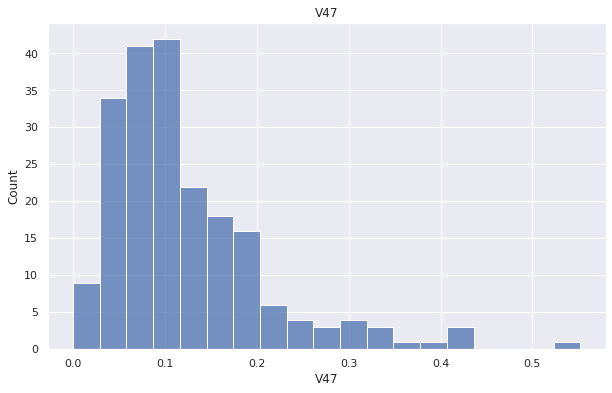

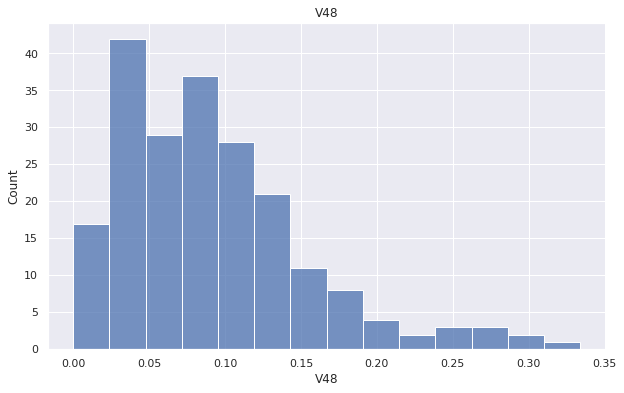

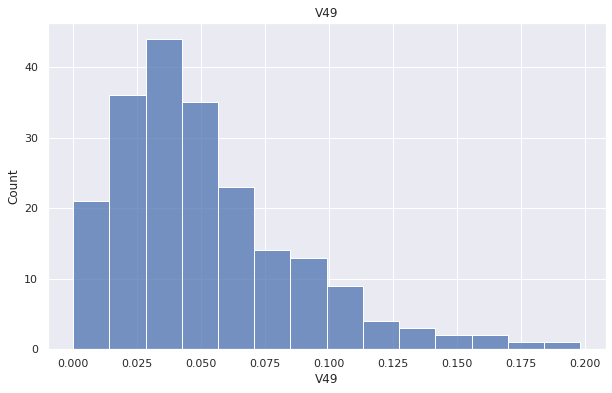

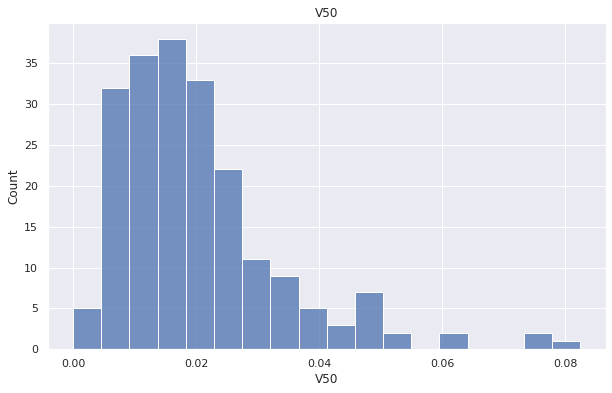

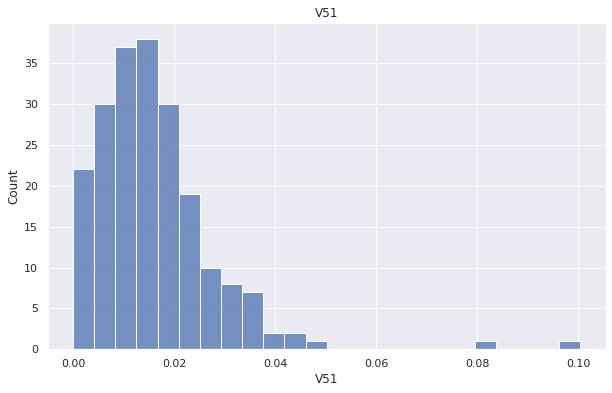

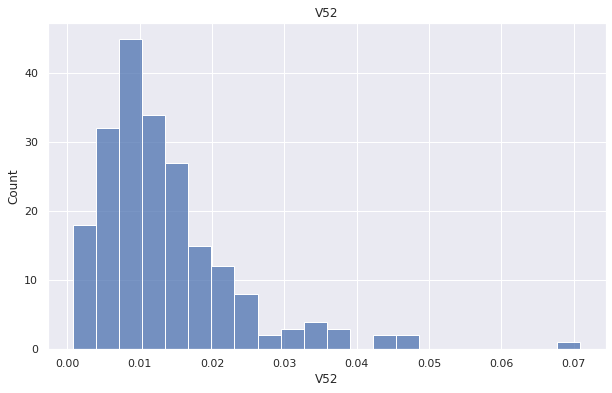

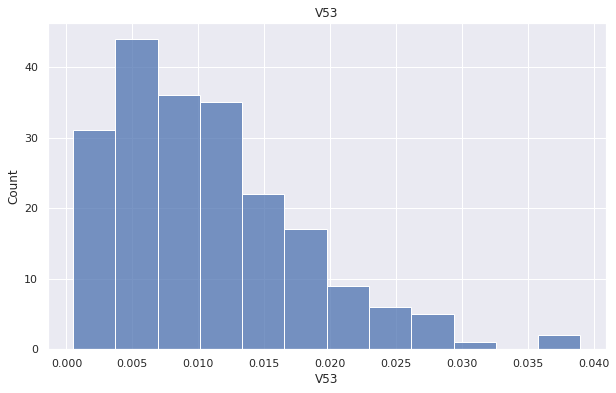

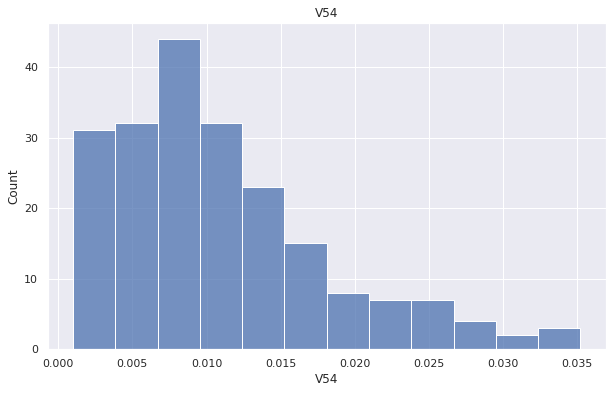

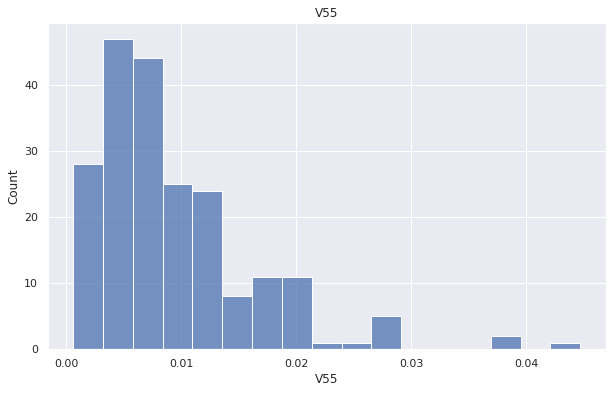

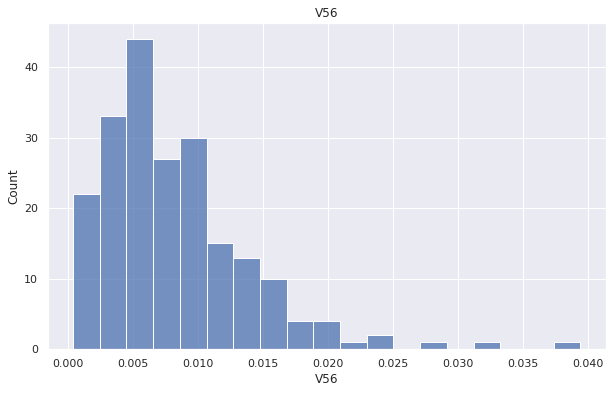

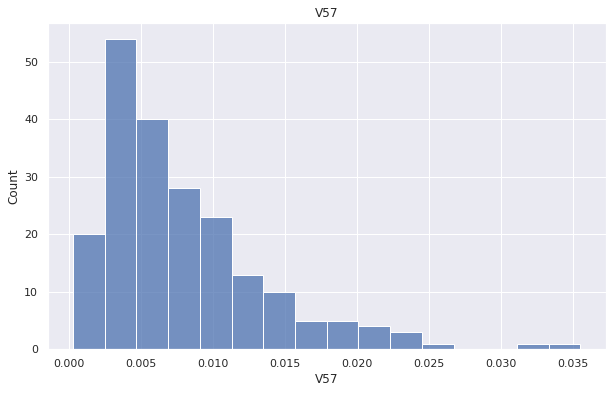

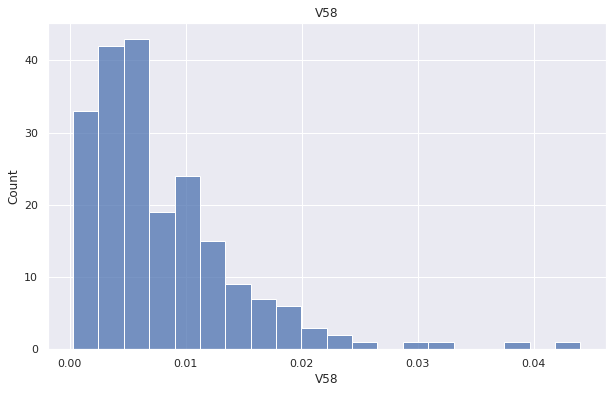

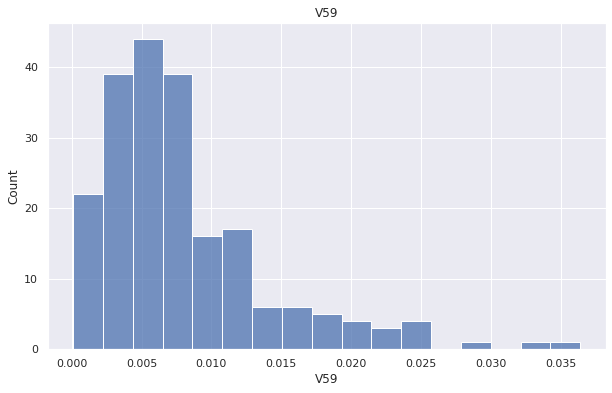

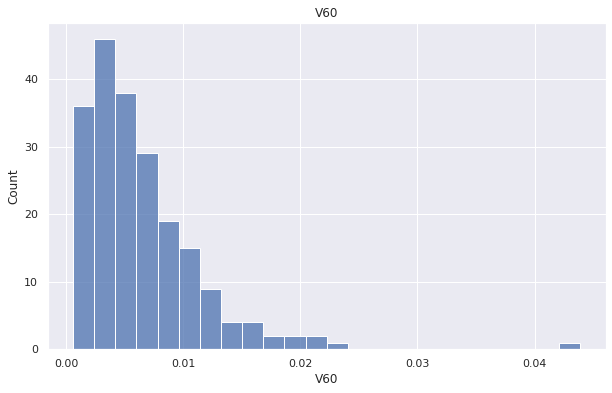

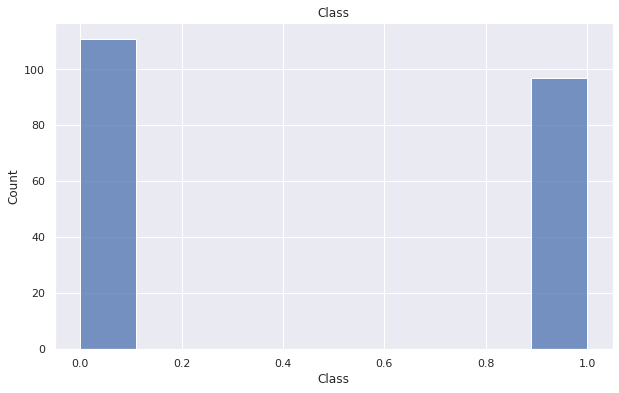

In [17]:
# histogram plot(for checking of skew,gaussian distribution)
histogram=df.copy()
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.histplot(histogram[col])
    plt.title(col)
    plt.show()

# low varaince and outliers

In [18]:
low_variance=df.copy()
var_thresh=VarianceThreshold(threshold=0.0001)
var_thresh.fit(low_variance)

VarianceThreshold(threshold=0.0001)

In [19]:
#list 0f feature to drop
constant_columns=[column for column in low_variance.columns
                 if column not in low_variance.columns[var_thresh.get_support()]]
print(len(constant_columns))
constant_columns

9


['V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60']

In [20]:
#drop low variance of below threshold (0.0001)
low_variance.drop(columns=constant_columns,axis=1,inplace=True)
low_variance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [21]:
low_variance.shape

(208, 52)

In [22]:
#remove outliers
from scipy import stats
import numpy as np

outliers=low_variance.copy()
z=np.abs(stats.zscore(outliers))
outliers=outliers[(z<3).all(axis=1)]

In [23]:
# shape of data after removal of outliers
outliers.shape

(175, 52)

In [24]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 207
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      175 non-null    float64
 1   V2      175 non-null    float64
 2   V3      175 non-null    float64
 3   V4      175 non-null    float64
 4   V5      175 non-null    float64
 5   V6      175 non-null    float64
 6   V7      175 non-null    float64
 7   V8      175 non-null    float64
 8   V9      175 non-null    float64
 9   V10     175 non-null    float64
 10  V11     175 non-null    float64
 11  V12     175 non-null    float64
 12  V13     175 non-null    float64
 13  V14     175 non-null    float64
 14  V15     175 non-null    float64
 15  V16     175 non-null    float64
 16  V17     175 non-null    float64
 17  V18     175 non-null    float64
 18  V19     175 non-null    float64
 19  V20     175 non-null    float64
 20  V21     175 non-null    float64
 21  V22     175 non-null    float64
 22  V2

# VALIDATION DATASET 

In [25]:
# Split-out validation dataset
df=outliers.copy()
array = df.values
X = array[:,0:51]
Y = array[:,51]

validation_size = 0.20
seed = 42
shuffle=True

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed,shuffle=shuffle)

In [26]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((140, 51), (35, 51), (140,), (35,))

In [27]:
df["Class"].value_counts()/len(df)

0.0    0.509
1.0    0.491
Name: Class, dtype: float64

In [28]:
# Test options and evaluation metric
num_folds = 5
scoring = 'accuracy'

In [29]:
# Tune scaled AdaBoostClassifier()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,150]
learning_rate=[0.1,0.01,0.001,1.0]

param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
model =AdaBoostClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_AdaBoostClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_AdaBoostClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- AdaBoostClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("----------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostClassifier(random_state=seed,**grid_AdaBoostClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- AdaBoostClassifier -------- 
-----------------------------------------------------------
Best: 0.792857 using {'learning_rate': 1.0, 'n_estimators': 150}
----------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.975
----------------------------------
f1_score :  0.9743589743589743
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.95
----------------------------------
-----Confusion_matrix Report : -----
 
[[15  0]
 [ 1 19]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.95      0.97        20

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97     

In [40]:
# Tune scaled ExtraTreesClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split = [2,3,4]
min_samples_leaf= [2,3,5,7]

param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_ExtraTreesClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_ExtraTreesClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- ExtraTreesClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(random_state=seed,**grid_ExtraTreesClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- ExtraTreesClassifier -------- 
-----------------------------------------------------------
Best: 0.828571 using {'min_samples_leaf': 2, 'min_samples_split': 2}
-----------------------------------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.975
----------------------------------
f1_score :  0.9743589743589743
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.95
----------------------------------
-----Confusion_matrix Report : -----
 
[[15  0]
 [ 1 19]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.95      0.97        20

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        

In [32]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))

model = model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_GradientBoostingClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_GradientBoostingClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- GradientBoostingClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(random_state=seed,**grid_GradientBoostingClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- GradientBoostingClassifier -------- 
-----------------------------------------------------------
Best: 0.835714 using {'n_estimators': 250}
-----------------------------------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.975
----------------------------------
f1_score :  0.9743589743589743
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.95
----------------------------------
-----Confusion_matrix Report : -----
 
[[15  0]
 [ 1 19]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.95      0.97        20

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg     

In [33]:
# Tune scaled Randomforest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

criterion=['gini','entropy']
min_samples_split = [2,3,4,5,6]
min_samples_leaf= [1,2,3,4]
n_estimators=[10,15,20,25,30]

param_grid = dict(criterion=criterion,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_RandomForestClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_RandomForestClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- RandomForestClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed,**grid_RandomForestClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- RandomForestClassifier -------- 
-----------------------------------------------------------
Best: 0.800000 using {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 10}
-----------------------------------------------------------
Acuracy score :  0.8285714285714286
----------------------------------
roc_auc_score :  0.8333333333333334
----------------------------------
f1_score :  0.8421052631578948
----------------------------------
precision_score :  0.8888888888888888
----------------------------------
recall :  0.8
----------------------------------
-----Confusion_matrix Report : -----
 
[[13  2]
 [ 4 16]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        15
         1.0       0.89      0.80      0.84        20

    accuracy                       

In [34]:
# Tune scaled LGBMClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[25,50,75,100]
boosting_type=['gbdt','dart','goss','rf']

param_grid = dict(n_estimators=n_estimators,boosting_type=boosting_type)
model = LGBMClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_LGBMClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_LGBMClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Light GradientBoosting Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LGBMClassifier(random_state=seed,**grid_LGBMClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- Light GradientBoosting Classifier -------- 
-----------------------------------------------------------
Best: 0.792857 using {'boosting_type': 'gbdt', 'n_estimators': 75}
-----------------------------------------------------------
Acuracy score :  0.9428571428571428
----------------------------------
roc_auc_score :  0.9416666666666667
----------------------------------
f1_score :  0.9500000000000001
----------------------------------
precision_score :  0.95
----------------------------------
recall :  0.95
----------------------------------
-----Confusion_matrix Report : -----
 
[[14  1]
 [ 1 19]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.95      0.95      0.95        20

    accuracy                           0.94        35
   macro avg       0.94   

In [35]:
# Tune scaled XGBClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate=[0.1,0.01]
n_estimators=[25,75,100,125,150]
max_depth=[3,5,7,9]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth)
model = XGBClassifier(random_state=seed,verbosity=0)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_XGBClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_XGBClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Extreme GradientBoosting Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = XGBClassifier(random_state=seed,**grid_XGBClassifier.best_params_,verbosity=0)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- Extreme GradientBoosting Classifier -------- 
-----------------------------------------------------------
Best: 0.807143 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
-----------------------------------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.9666666666666667
----------------------------------
f1_score :  0.975609756097561
----------------------------------
precision_score :  0.9523809523809523
----------------------------------
recall :  1.0
----------------------------------
-----Confusion_matrix Report : -----
 
[[14  1]
 [ 0 20]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.98        20

    accuracy                           0.97        3

In [36]:
#prevent CatBoostClassifier to throw out error
class CatBoostClassifier(CatBoostClassifier):
    def _get_tags(self):
        return {'pairwise' : False}

In [ ]:
<p> hello<p>
 hello<br>
<p> hello<p>
<p>i am going to the <b>market<b>.<h2